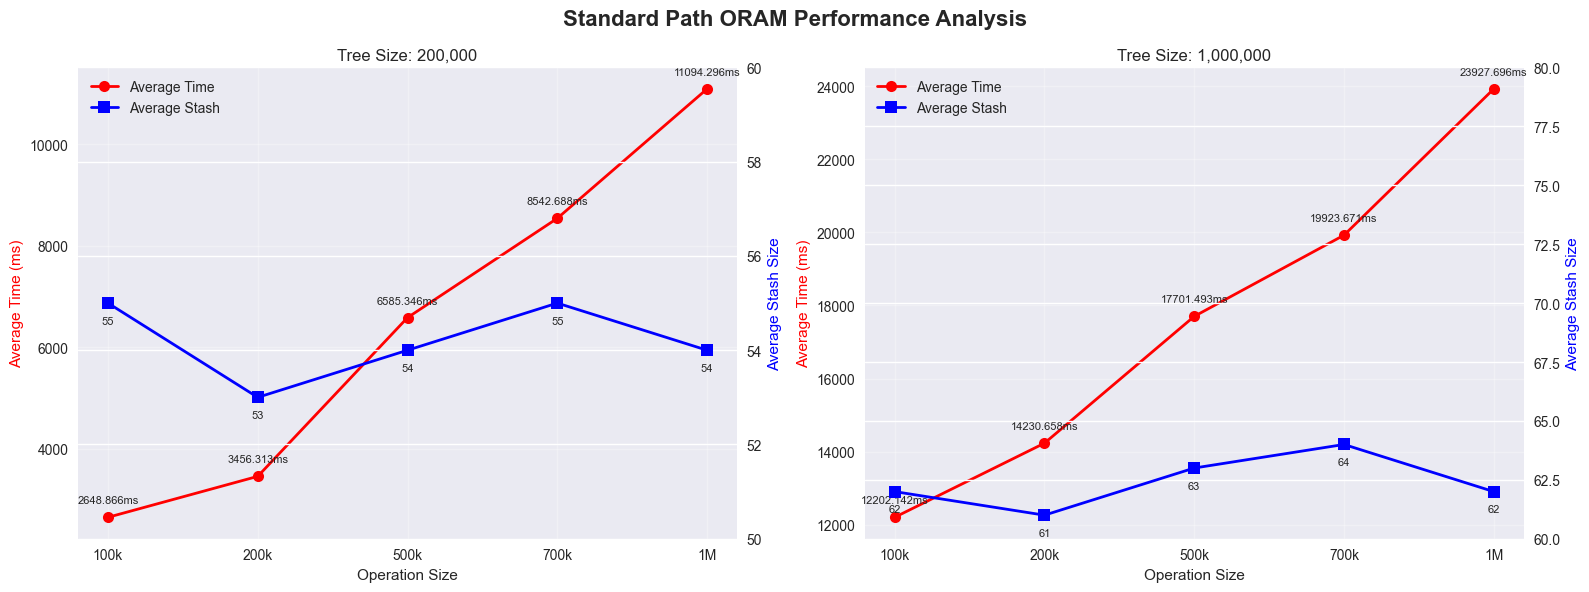


=== Standard Path Oram Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 15.3619 μs
Average Stash Size: 54.2
Time per Operation Range: 11.0943 - 26.4887 μs
Stash Range: 53 - 55

Detailed Performance Table (Tree Size: 200,000) for Standard Path Oram:
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     26.4887      26.1422      27.3493      55           50           60          
200000.0        200000.0     17.2816      17.2013      17.4827      53           50           57          
500000.0        200000.0     13.1707      12.4014      14.2944      54           51           59          
700000.0        200000.0     12.2038      11.7174      12.9947      55           51           65          
1000000.0       200000.0     11.0943      10.2920      11.7150      54           52           57          

=== 

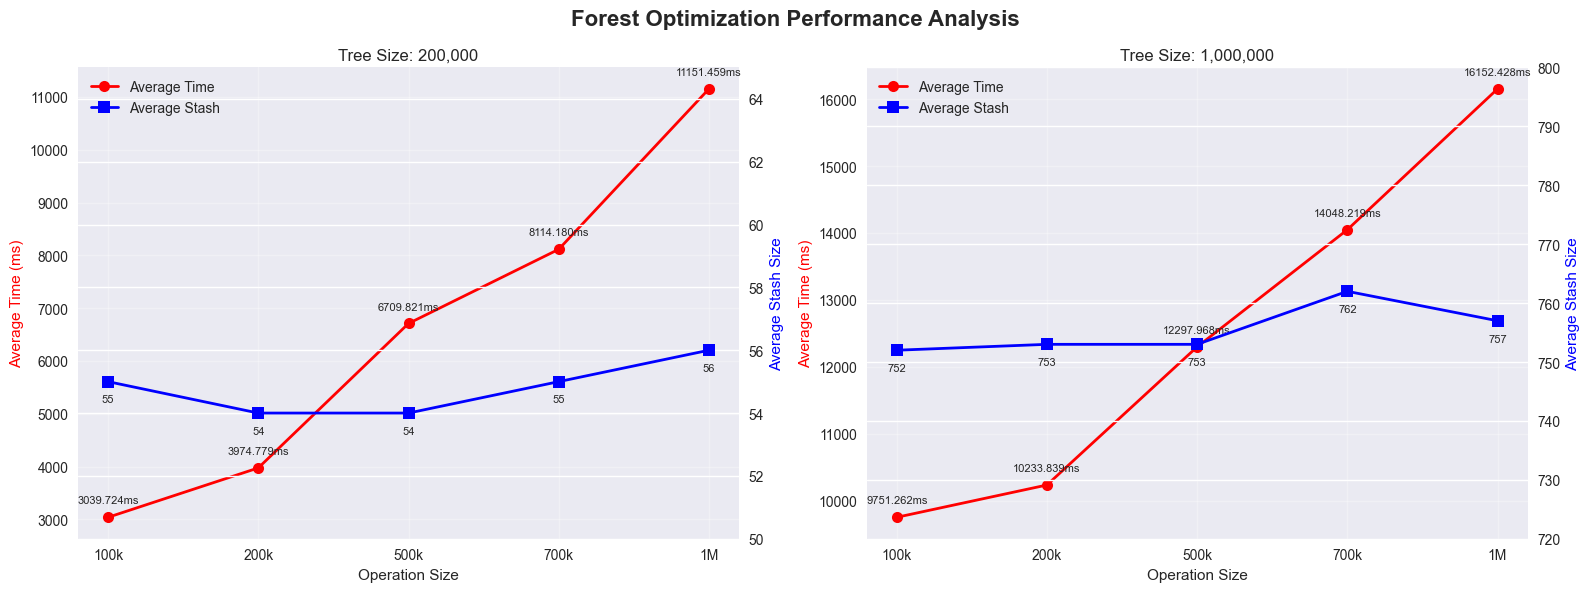


=== Forest Opt Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 16.4149 μs
Average Stash Size: 54.8
Time per Operation Range: 11.1515 - 30.3972 μs
Stash Range: 54 - 56

Detailed Performance Table (Tree Size: 200,000) for Forest Opt:
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     30.3972      29.4089      31.1449      55           51           59          
200000.0        200000.0     19.8739      19.5175      20.3970      54           51           58          
500000.0        200000.0     13.4196      12.7771      14.2554      54           48           61          
700000.0        200000.0     11.5917      11.4781      11.7268      55           51           61          
1000000.0       200000.0     11.1515      10.6618      11.6158      56           52           62          

=== Forest Opt Algor

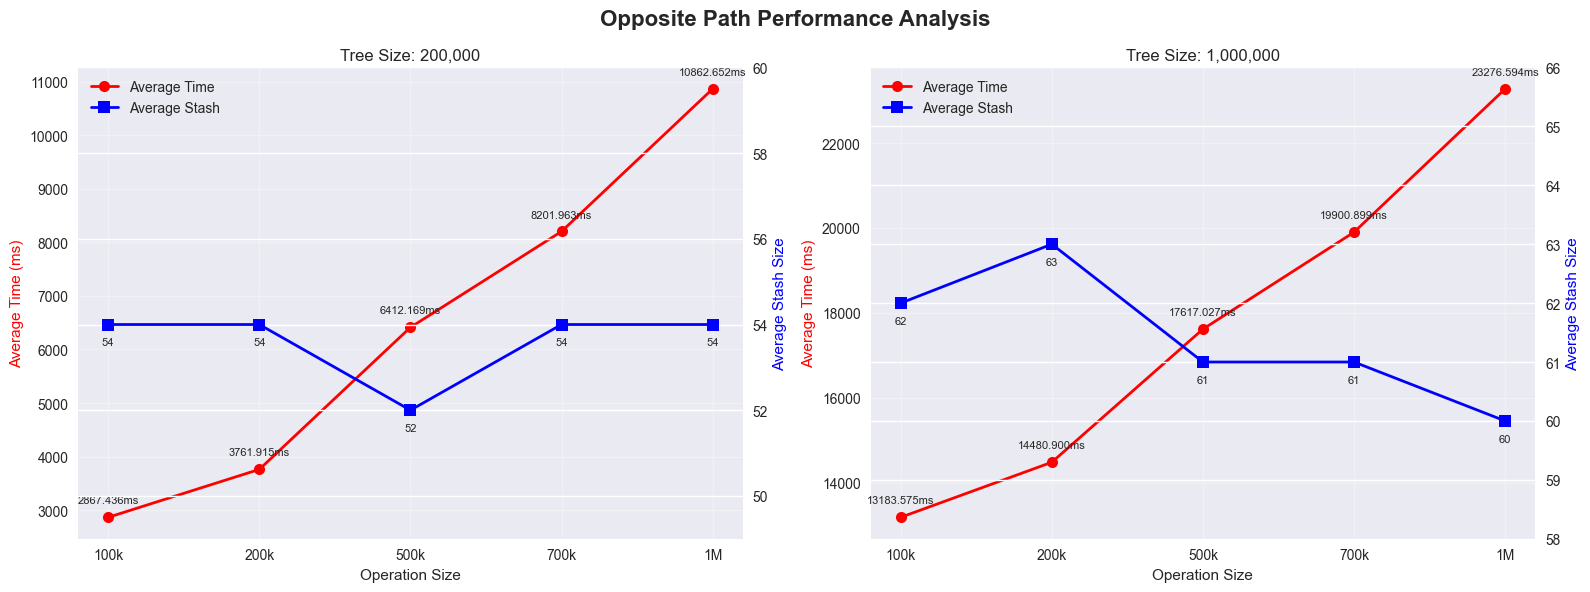


=== Opposite Path Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 15.7799 μs
Average Stash Size: 53.8
Time per Operation Range: 10.8627 - 28.6744 μs
Stash Range: 52 - 54

Detailed Performance Table (Tree Size: 200,000) for Opposite Path:
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     28.6744      28.3649      29.5379      54           49           61          
200000.0        200000.0     18.8096      18.5882      19.2938      54           51           58          
500000.0        200000.0     12.8243      12.6587      13.0350      52           50           57          
700000.0        200000.0     11.7171      11.5794      11.8699      54           50           60          
1000000.0       200000.0     10.8627      10.6607      11.0276      54           51           62          

=== Opposite P

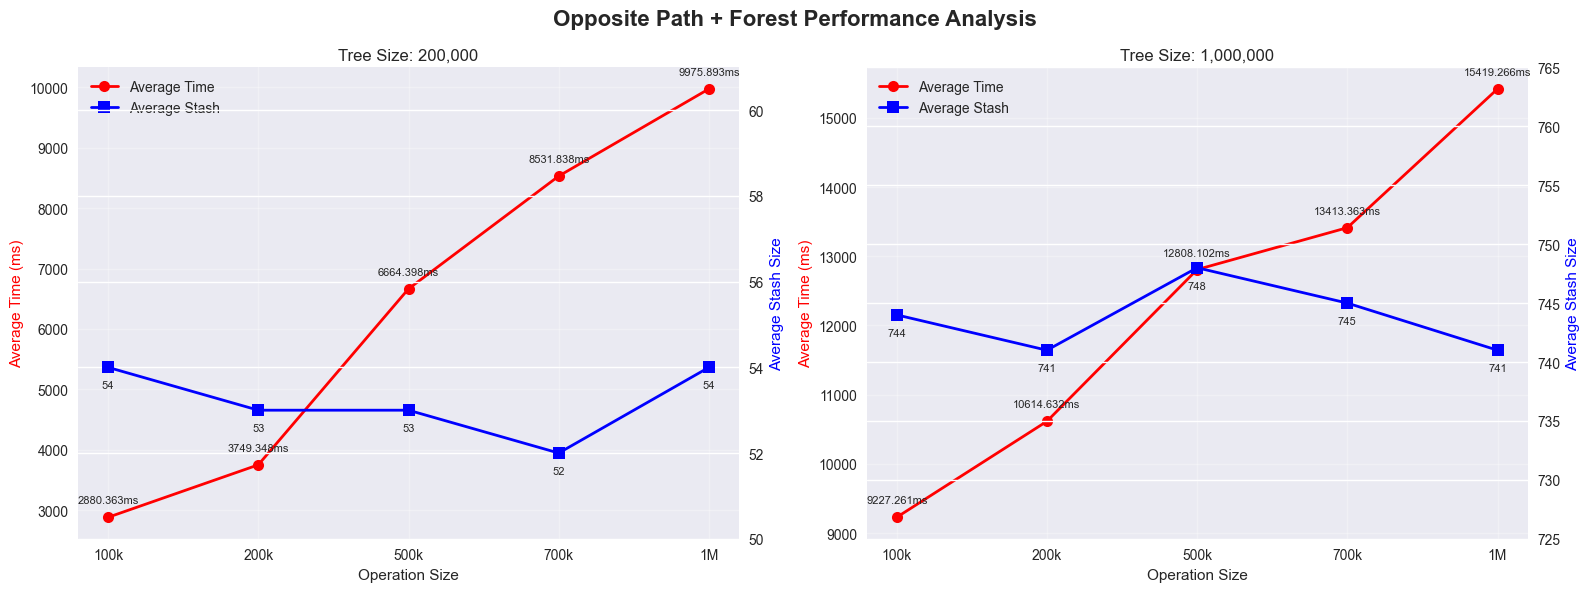


=== Opposite Path Forest Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 15.9134 μs
Average Stash Size: 53.2
Time per Operation Range: 9.9759 - 28.8036 μs
Stash Range: 52 - 54

Detailed Performance Table (Tree Size: 200,000) for Opposite Path Forest:
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     28.8036      27.9266      29.5299      54           49           60          
200000.0        200000.0     18.7467      18.4813      19.2649      53           50           58          
500000.0        200000.0     13.3288      12.8750      13.7519      53           50           64          
700000.0        200000.0     12.1883      11.6299      12.6876      52           50           55          
1000000.0       200000.0     9.9759       9.9017       10.0844      54           50           57          

=

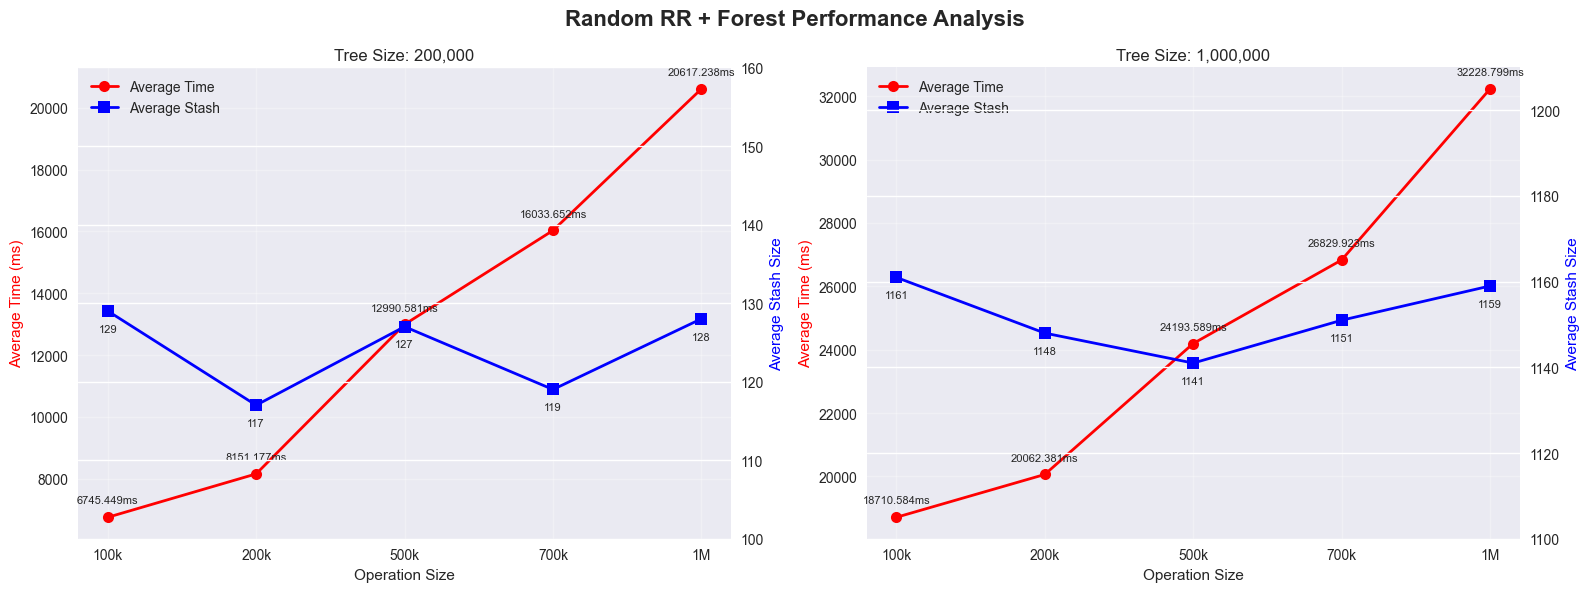


=== Random Rr Forest Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 33.4195 μs
Average Stash Size: 124.2
Time per Operation Range: 20.6172 - 67.4545 μs
Stash Range: 117 - 129

Detailed Performance Table (Tree Size: 200,000) for Random Rr Forest:
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     67.4545      65.3695      69.5816      129          113          140         
200000.0        200000.0     40.7559      39.1812      42.3911      117          101          135         
500000.0        200000.0     25.9812      25.4437      26.6284      127          111          143         
700000.0        200000.0     22.9052      22.5094      23.2309      119          108          131         
1000000.0       200000.0     20.6172      20.2845      20.8888      128          115          148         

=== R

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def custom_mean(series):
    return (series.mean() * 10 - series.max() - series.min()) / 8 

chart_titles = {
    'main_titles': {
        'standard_path_oram': 'Standard Path ORAM Performance Analysis',
        'forest_opt': 'Forest Optimization Performance Analysis', 
        'opposite_path': 'Opposite Path Performance Analysis',
        'opposite_path_forest': 'Opposite Path + Forest Performance Analysis',
        'random_rr_forest': 'Random RR + Forest Performance Analysis'
    },
    
    'subplot_titles': {
        'tree_200k': 'Tree Size: 200,000',
        'tree_1m': 'Tree Size: 1,000,000'
    },
    
    'axis_labels': {
        'x_label': 'Operation Size',
        'y_label_time': 'Average Time (ms)',
        'y_label_stash': 'Average Stash Size'
    },
    
    'legend_labels': {
        'time': 'Average Time',
        'stash': 'Average Stash'
    },
    
    'operation_labels': ['100k', '200k', '500k', '700k', '1M'],
    
    'stat_titles': {
        'summary_200k': 'Algorithm Summary (Tree Size: 200,000)',
        'summary_1m': 'Algorithm Summary (Tree Size: 1,000,000)',
        'detailed_table_200k': 'Detailed Performance Table (Tree Size: 200,000)',
        'detailed_table_1m': 'Detailed Performance Table (Tree Size: 1,000,000)',
        'comparison_200k': 'COMPREHENSIVE COMPARISON TABLE (Tree Size: 200,000)',
        'comparison_1m': 'COMPREHENSIVE COMPARISON TABLE (Tree Size: 1,000,000)',
        'rankings_200k': 'PERFORMANCE RANKINGS (Tree Size: 200,000)',
        'rankings_1m': 'PERFORMANCE RANKINGS (Tree Size: 1,000,000)',
        'time_ranking': 'Time per Operation Performance Ranking (Best to Worst):',
        'stash_ranking': 'Stash Size Ranking (Best to Worst):'
    },
    
    'table_headers': {
        'detailed_table': ['Operation Size', 'Tree Size', 'Avg Time/Op', 'Min Time/Op', 
                          'Max Time/Op', 'Avg Stash', 'Min Stash', 'Max Stash'],
        'comparison_table': ['Algorithm', 'Avg Time per Op (μs)', 'Min Time per Op (μs)', 
                            'Max Time per Op (μs)', 'Avg Stash', 'Min Stash', 'Max Stash',
                            'Time per Op Std Dev', 'Stash Std Dev']
    }
}

stash_ranges = {
    'standard_path_oram_200k': (50, 60),
    'standard_path_oram_1m': (60, 80),
    'forest_opt_200k': (50, 65),
    'forest_opt_1m': (720, 800),
    'opposite_path_200k': (49, 60),
    'opposite_path_1m': (58, 66),
    'opposite_path_forest_200k': (50, 61),
    'opposite_path_forest_1m': (725, 765),
    'random_rr_forest_200k': (100, 160),
    'random_rr_forest_1m': (1100, 1210)
}


colors = {
    'standard_path_oram': '#1f77b4',
    'forest_opt': '#ff7f0e', 
    'opposite_path': '#2ca02c',
    'opposite_path_forest': '#d62728',
    'random_rr_forest': '#9467bd'
}

csv_files = {
    'standard_path_oram': './csv/result_standard_path_oram.csv',
    'forest_opt': './csv/result_forest_opt.csv',
    'opposite_path': './csv/result_opposite_path.csv',
    'opposite_path_forest': './csv/result_opposite_path_forest.csv',
    'random_rr_forest': './csv/result_random_rr_forest.csv'
}

dataframes = {}
for name, file in csv_files.items():
    dataframes[name] = pd.read_csv(file)

for name, df in dataframes.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    fig.suptitle(chart_titles['main_titles'][name], 
                 fontsize=16, fontweight='bold')
    
    subset_200k = df[df['tree_size'] == 200000]
    
    x_positions = [0, 1, 2, 3, 4]
    
    time_ms_200k = subset_200k['avg_time'] / 1000.0
    line1 = ax1.plot(x_positions, time_ms_200k, 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label=chart_titles['legend_labels']['time'])
    
    ax1_twin = ax1.twinx()
    line2 = ax1_twin.plot(x_positions, subset_200k['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label=chart_titles['legend_labels']['stash'])
    
    for i, y in enumerate(time_ms_200k):
        ax1.annotate(f'{y:.3f}ms', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_200k['avg_stash']):
        ax1_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax1.set_xlabel(chart_titles['axis_labels']['x_label'])
    ax1.set_ylabel(chart_titles['axis_labels']['y_label_time'], color='red')
    ax1_twin.set_ylabel(chart_titles['axis_labels']['y_label_stash'], color='blue')
    ax1_twin.set_ylim(stash_ranges[f'{name}_200k'])
    ax1.set_title(chart_titles['subplot_titles']['tree_200k'])
    ax1.grid(True, alpha=0.3)
    
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(chart_titles['operation_labels'])
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    subset_1m = df[df['tree_size'] == 1000000]
    
    time_ms_1m = subset_1m['avg_time'] / 1000.0
    line3 = ax2.plot(x_positions, time_ms_1m, 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label=chart_titles['legend_labels']['time'])
    
    ax2_twin = ax2.twinx()
    line4 = ax2_twin.plot(x_positions, subset_1m['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label=chart_titles['legend_labels']['stash'])
    
    for i, y in enumerate(time_ms_1m):
        ax2.annotate(f'{y:.3f}ms', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_1m['avg_stash']):
        ax2_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax2.set_xlabel(chart_titles['axis_labels']['x_label'])
    ax2.set_ylabel(chart_titles['axis_labels']['y_label_time'], color='red')
    ax2_twin.set_ylabel(chart_titles['axis_labels']['y_label_stash'], color='blue')
    ax2_twin.set_ylim(stash_ranges[f'{name}_1m'])
    ax2.set_title(chart_titles['subplot_titles']['tree_1m'])
    ax2.grid(True, alpha=0.3)
    
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(chart_titles['operation_labels'])
    
    lines3, labels3 = ax2.get_legend_handles_labels()
    lines4, labels4 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper left')
    
    plt.tight_layout()
    plt.show()
    

    subset_200k = df[df['tree_size'] == 200000].copy()

    subset_200k.loc[:, 'time_per_op'] = subset_200k['avg_time'] / subset_200k['operate_size'] / 1000.0
    
    print(f"\n=== {name.replace('_', ' ').title()} {chart_titles['stat_titles']['summary_200k']} ===")
    avg_time_per_op = custom_mean(subset_200k['time_per_op']) * 1000.0
    avg_stash = custom_mean(subset_200k['avg_stash'])
    print(f"Average Time per Operation: {avg_time_per_op:.4f} μs")
    print(f"Average Stash Size: {avg_stash:.1f}")
    print(f"Time per Operation Range: {subset_200k['time_per_op'].min() * 1000.0:.4f} - {subset_200k['time_per_op'].max() * 1000.0:.4f} μs")
    print(f"Stash Range: {subset_200k['avg_stash'].min():.0f} - {subset_200k['avg_stash'].max():.0f}")
    
    print(f"\n{chart_titles['stat_titles']['detailed_table_200k']} for {name.replace('_', ' ').title()}:")
    print("=" * 80)
    print(f"{'Operation Size':<15} {'Tree Size':<12} {'Avg Time/Op':<12} {'Min Time/Op':<12} {'Max Time/Op':<12} {'Avg Stash':<12} {'Min Stash':<12} {'Max Stash':<12}")
    print("-" * 80)
    
    for _, row in subset_200k.iterrows():
        min_time_per_op = row['min_time'] / row['operate_size'] / 1000.0
        max_time_per_op = row['max_time'] / row['operate_size'] / 1000.0
        print(f"{row['operate_size']:<15} {row['tree_size']:<12} {row['time_per_op'] * 1000.0:<12.4f} {min_time_per_op * 1000.0:<12.4f} {max_time_per_op * 1000.0:<12.4f} {row['avg_stash']:<12.0f} {row['min_stash']:<12.0f} {row['max_stash']:<12.0f}")
    
    print("=" * 80)
    

    subset_1m = df[df['tree_size'] == 1000000].copy()
    subset_1m.loc[:, 'time_per_op'] = subset_1m['avg_time'] / subset_1m['operate_size'] / 1000.0
    
    print(f"\n=== {name.replace('_', ' ').title()} {chart_titles['stat_titles']['summary_1m']} ===")
    avg_time_per_op_1m = custom_mean(subset_1m['time_per_op']) * 1000.0
    avg_stash_1m = custom_mean(subset_1m['avg_stash'])
    print(f"Average Time per Operation: {avg_time_per_op_1m:.4f} μs")
    print(f"Average Stash Size: {avg_stash_1m:.1f}")
    print(f"Time per Operation Range: {subset_1m['time_per_op'].min() * 1000.0:.4f} - {subset_1m['time_per_op'].max() * 1000.0:.4f} μs")
    print(f"Stash Range: {subset_1m['avg_stash'].min():.0f} - {subset_1m['avg_stash'].max():.0f}")
    
    print(f"\n{chart_titles['stat_titles']['detailed_table_1m']} for {name.replace('_', ' ').title()}:")
    print("=" * 80)
    print(f"{'Operation Size':<15} {'Tree Size':<12} {'Avg Time/Op':<12} {'Min Time/Op':<12} {'Max Time/Op':<12} {'Avg Stash':<12} {'Min Stash':<12} {'Max Stash':<12}")
    print("-" * 80)
    
    for _, row in subset_1m.iterrows():
        min_time_per_op = row['min_time'] / row['operate_size'] / 1000.0
        max_time_per_op = row['max_time'] / row['operate_size'] / 1000.0
        print(f"{row['operate_size']:<15} {row['tree_size']:<12} {row['time_per_op'] * 1000.0:<12.4f} {min_time_per_op * 1000.0:<12.4f} {max_time_per_op * 1000.0:<12.4f} {row['avg_stash']:<12.0f} {row['min_stash']:<12.0f} {row['max_stash']:<12.0f}")
    
    print("=" * 80)
    print()

print("\n" + "="*100)
print(chart_titles['stat_titles']['comparison_200k'])
print("="*100)

comparison_data_200k = []
for name, df in dataframes.items():
    subset_200k = df[df['tree_size'] == 200000].copy()
    subset_200k.loc[:, 'time_per_op'] = subset_200k['avg_time'] / subset_200k['operate_size'] / 1000.0
    comparison_data_200k.append({
        'Algorithm': name.replace('_', ' ').title(),
        'Avg Time per Op (μs)': custom_mean(subset_200k['time_per_op']) * 1000.0,
        'Min Time per Op (μs)': subset_200k['time_per_op'].min() * 1000.0,
        'Max Time per Op (μs)': subset_200k['time_per_op'].max() * 1000.0,
        'Avg Stash': custom_mean(subset_200k['avg_stash']),
        'Min Stash': subset_200k['avg_stash'].min(),
        'Max Stash': subset_200k['avg_stash'].max(),
        'Time per Op Std Dev': subset_200k['time_per_op'].std() * 1000.0,
        'Stash Std Dev': subset_200k['avg_stash'].std()
    })

comparison_df_200k = pd.DataFrame(comparison_data_200k)
print(comparison_df_200k.to_string(index=False, float_format='%.4f'))

print("\n" + "="*100)
print(chart_titles['stat_titles']['comparison_1m'])
print("="*100)

comparison_data_1m = []
for name, df in dataframes.items():
    subset_1m = df[df['tree_size'] == 1000000].copy()
    subset_1m.loc[:, 'time_per_op'] = subset_1m['avg_time'] / subset_1m['operate_size'] / 1000.0
    comparison_data_1m.append({
        'Algorithm': name.replace('_', ' ').title(),
        'Avg Time per Op (μs)': custom_mean(subset_1m['time_per_op']) * 1000.0,
        'Min Time per Op (μs)': subset_1m['time_per_op'].min() * 1000.0,
        'Max Time per Op (μs)': subset_1m['time_per_op'].max() * 1000.0,
        'Avg Stash': custom_mean(subset_1m['avg_stash']),
        'Min Stash': subset_1m['avg_stash'].min(),
        'Max Stash': subset_1m['avg_stash'].max(),
        'Time per Op Std Dev': subset_1m['time_per_op'].std() * 1000.0,
        'Stash Std Dev': subset_1m['avg_stash'].std()
    })

comparison_df_1m = pd.DataFrame(comparison_data_1m)
print(comparison_df_1m.to_string(index=False, float_format='%.4f'))

print("\n" + "="*80)
print(chart_titles['stat_titles']['rankings_200k'])
print("="*80)

time_ranking_200k = comparison_df_200k.sort_values('Avg Time per Op (μs)')
print(f"\n{chart_titles['stat_titles']['time_ranking']}")
for i, (_, row) in enumerate(time_ranking_200k.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Time per Op (μs)']:.4f} μs")

stash_ranking_200k = comparison_df_200k.sort_values('Avg Stash')
print(f"\n{chart_titles['stat_titles']['stash_ranking']}")
for i, (_, row) in enumerate(stash_ranking_200k.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Stash']:.1f}")

print("\n" + "="*80)
print(chart_titles['stat_titles']['rankings_1m'])
print("="*80)

time_ranking_1m = comparison_df_1m.sort_values('Avg Time per Op (μs)')
print(f"\n{chart_titles['stat_titles']['time_ranking']}")
for i, (_, row) in enumerate(time_ranking_1m.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Time per Op (μs)']:.4f} μs")

stash_ranking_1m = comparison_df_1m.sort_values('Avg Stash')
print(f"\n{chart_titles['stat_titles']['stash_ranking']}")
for i, (_, row) in enumerate(stash_ranking_1m.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Stash']:.1f}")

print("\n" + "="*80) 

